In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem

from utils import *
from plotting import make_simple_boxplot

In [2]:
matchms_scores = pd.read_csv("../data/output_matching/matchms/matchms_tol_0.0035_1%I_all_peaks_with_0s_only_matching.tsv", sep="\t")
matchms_scores.rename(columns={'CosineHungarian_0.0035_0.0_1.0_scores': 'scores'}, inplace=True)
matchms_scores.rename(columns={'CosineHungarian_0.0035_0.0_1.0_matches': 'matches'}, inplace=True)

matchms_scores = append_classes(matchms_scores, 'query')
df = normalize_df(append_spectrum_metadata(matchms_scores))
del df['peak_comments']

matches_col = 'matches'
scores_col = 'scores'

df['matches_norm_query'] = df[matches_col] / df['n_peaks_query']
df['matches_norm_reference'] = df[matches_col] / df['n_peaks_reference']

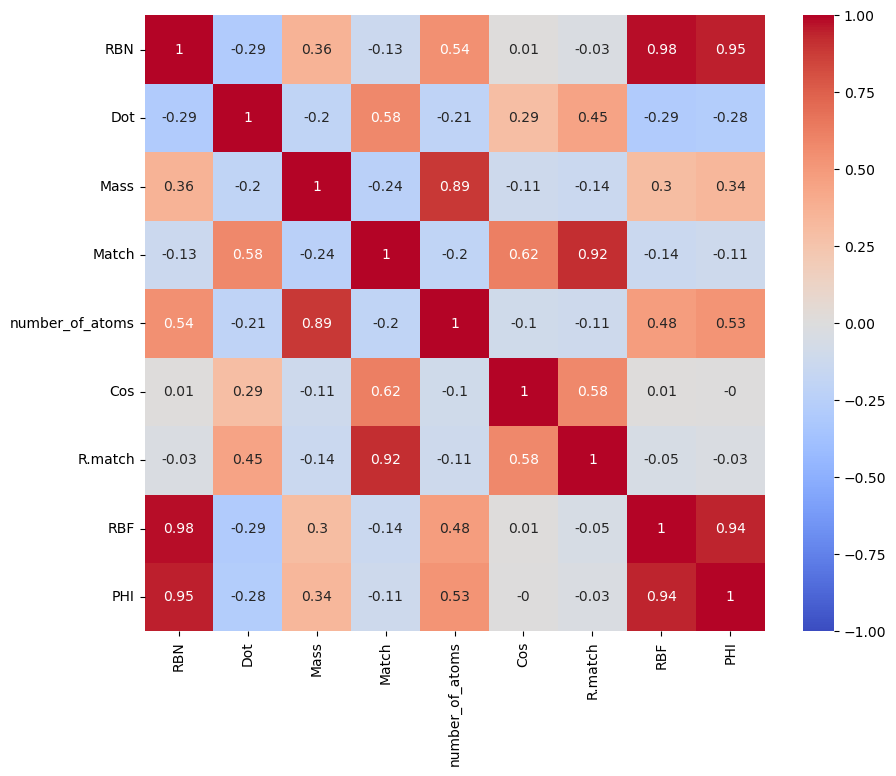

In [3]:
wang_db = pd.read_csv("../data/reference/13321_2020_470_MOESM1_ESM.csv")
wang_props = ["RBN", "Dot", "Mass", "Match", "number_of_atoms", "Cos", "R.match", "RBF", "PHI"]
# Assuming `df` is your DataFrame
corr_wang = wang_db[wang_props].corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_wang, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
# plt.title('Pearson Correlations')
plt.show()

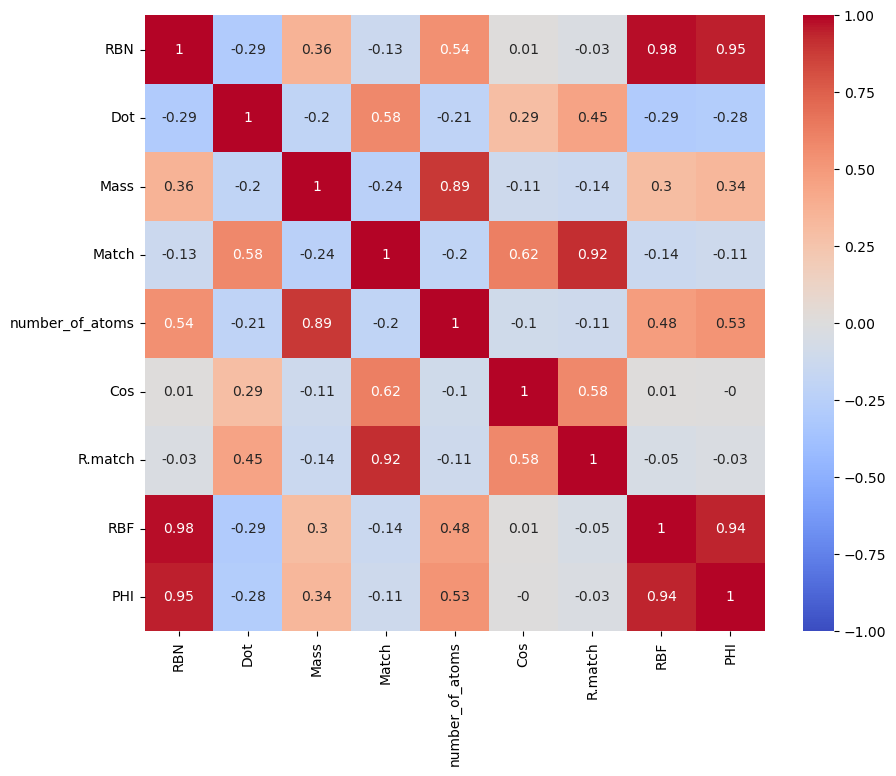

In [4]:
wang_db_tms = pd.read_csv("../data/reference/wang2022_TMS_annotated.tsv", sep="\t", decimal=",")
wang_props = ["RBN", "Dot", "Mass", "Match", "number_of_atoms", "Cos", "R.match", "RBF", "PHI"]
# Assuming `df` is your DataFrame
corr_wang = wang_db[wang_props].corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_wang, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
# plt.title('Pearson Correlations')
plt.show()

In [5]:
properties = [
    'scores',
    'matches',
    'matches_norm_query',
    'matches_norm_reference',
    'molecular_flexibility',
    'rotatable_bonds',
    'stereo_centers',
    'molecular_complexity',
    'n_atoms',
    'precursor_mz',
    'electronegative_atoms',
    'aromatic_nitrogens',
    'amines',
    'amides',
]

In [6]:
wang_db["study"] = "Wang2020"
wang_db_tms["study"] = "Wang2022"
df["study"] = "This study"

In [7]:
wang_colwise_means = wang_db.mean(numeric_only=True)
wang_tms_colwise_means = wang_db_tms.mean(numeric_only=True)
our_means = df.mean(numeric_only=True)

wang_colwise_means = wang_db.median(numeric_only=True)
wang_tms_colwise_means = wang_db_tms.median(numeric_only=True)
our_means = df.median(numeric_only=True)

/m2b/home/hechth/git/recetox/ei_spectra_predictions/analysis/Python_scripts/plotting.py:267: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation=45, ha=ha)


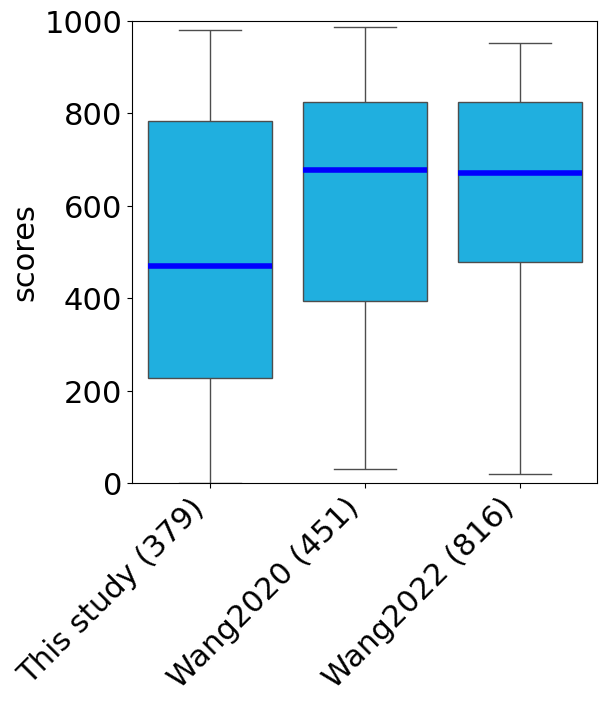

In [8]:
cols = ["study", "Dot"]
combined = pd.concat([df.rename(columns={"scores": "Dot"})[cols], wang_db[cols], wang_db_tms[cols]])

make_simple_boxplot(combined, "study", "Dot").show()

/m2b/home/hechth/git/recetox/ei_spectra_predictions/analysis/Python_scripts/plotting.py:267: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation=45, ha=ha)


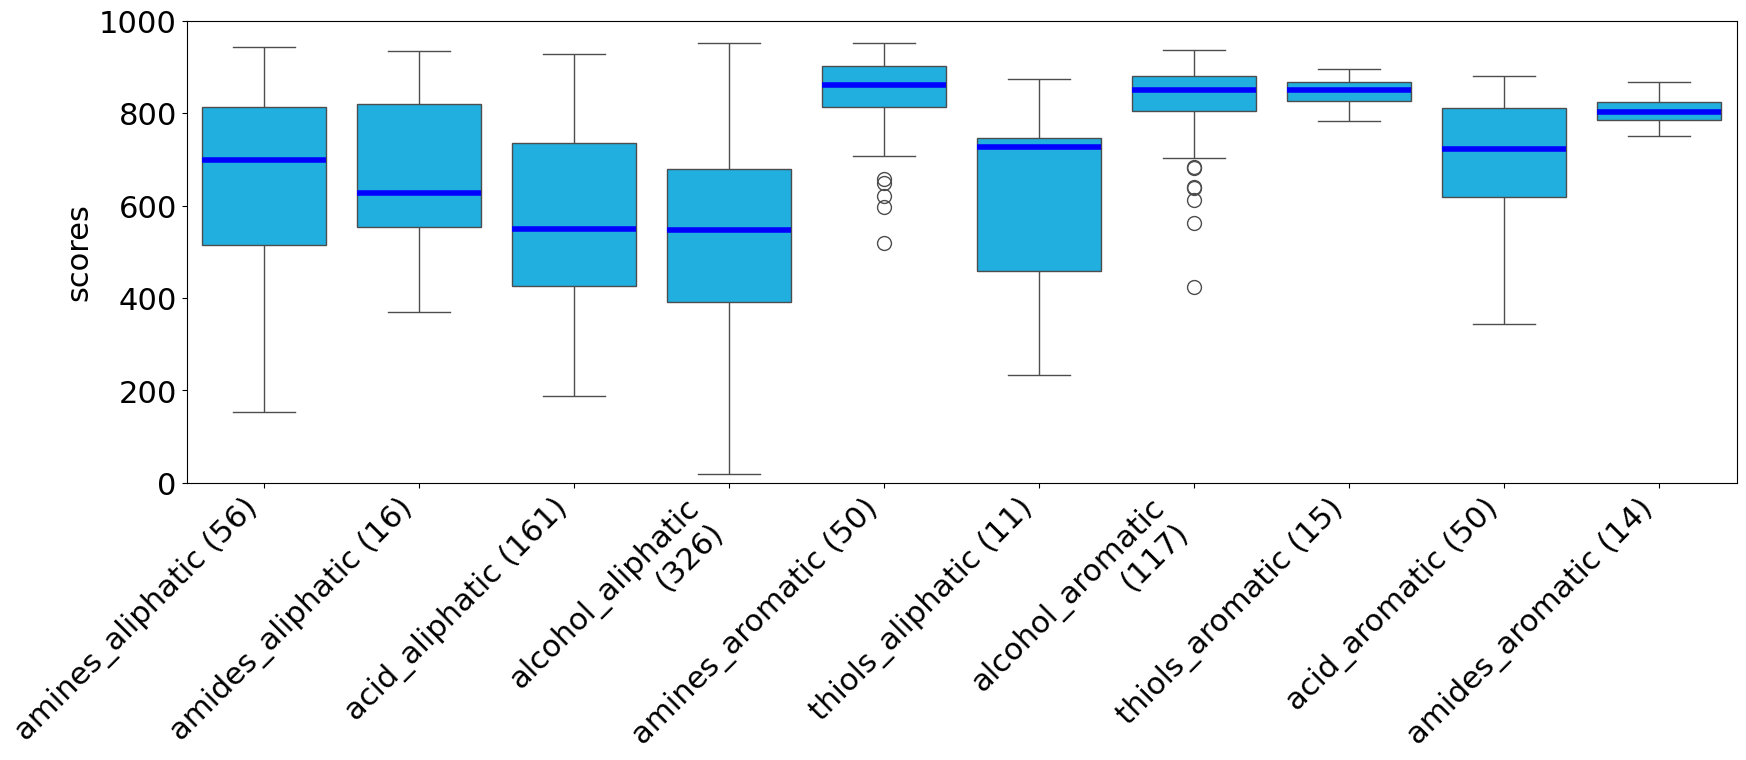

In [9]:
wang_db_tms["classification"] = wang_db_tms["superclass"] + "_" + wang_db_tms["subclass"]
make_simple_boxplot(wang_db_tms, x="classification", y="Dot").show()

/m2b/home/hechth/git/recetox/ei_spectra_predictions/analysis/Python_scripts/plotting.py:267: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation=45, ha=ha)


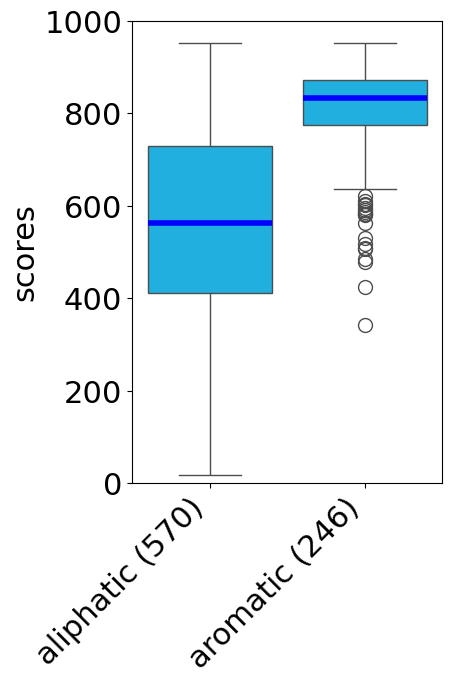

In [10]:
make_simple_boxplot(wang_db_tms, x="subclass", y="Dot").show()

/m2b/home/hechth/git/recetox/ei_spectra_predictions/analysis/Python_scripts/plotting.py:267: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation=45, ha=ha)


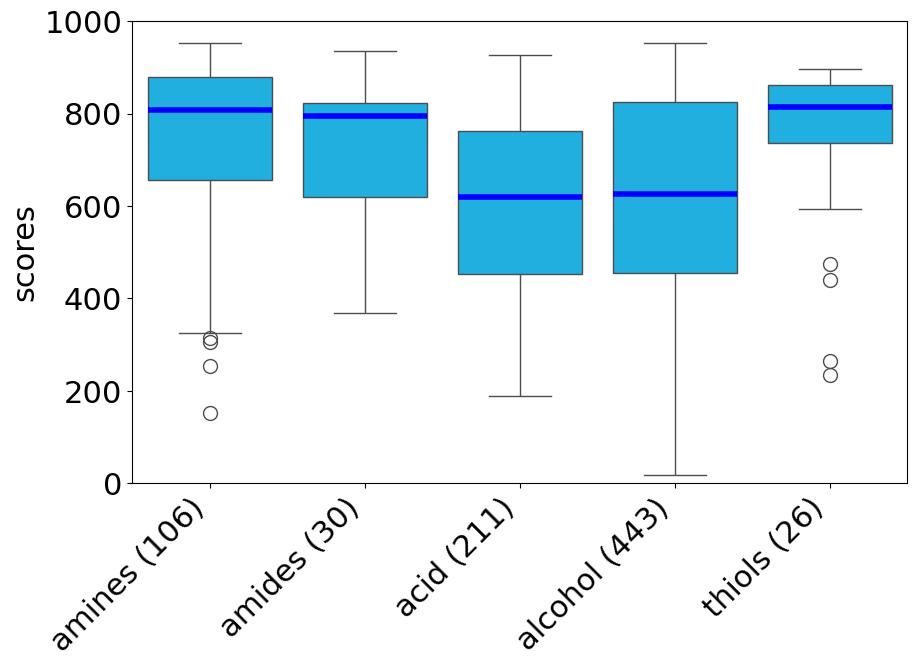

In [11]:
make_simple_boxplot(wang_db_tms, x="superclass", y="Dot").show()

In [13]:
df_wang2020_db_with_classes = load_sdf_into_df("../data/reference/wang2020/3411.sdf")
wang_db_merged = df_wang2020_db_with_classes.set_index("inchikey").join(wang_db.set_index("Inchikey "))[["superclass","class","subclass","Dot"]].dropna()

[10:33:22] ERROR: Problems encountered parsing data fields
[10:33:22] ERROR: moving to the beginning of the next molecule
[10:33:22] ERROR: Problems encountered parsing data fields
[10:33:22] ERROR: moving to the beginning of the next molecule
[10:33:22] ERROR: Problems encountered parsing data fields
[10:33:22] ERROR: moving to the beginning of the next molecule
[10:33:22] ERROR: Problems encountered parsing data fields
[10:33:22] ERROR: moving to the beginning of the next molecule
[10:33:22] ERROR: Problems encountered parsing data fields
[10:33:22] ERROR: moving to the beginning of the next molecule
[10:33:22] ERROR: Problems encountered parsing data fields
[10:33:22] ERROR: moving to the beginning of the next molecule
[10:33:22] ERROR: Problems encountered parsing data fields
[10:33:22] ERROR: moving to the beginning of the next molecule
[10:33:22] ERROR: Problems encountered parsing data fields
[10:33:22] ERROR: moving to the beginning of the next molecule
[10:33:22] ERROR: Proble

/m2b/home/hechth/git/recetox/ei_spectra_predictions/analysis/Python_scripts/plotting.py:267: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation=45, ha=ha)


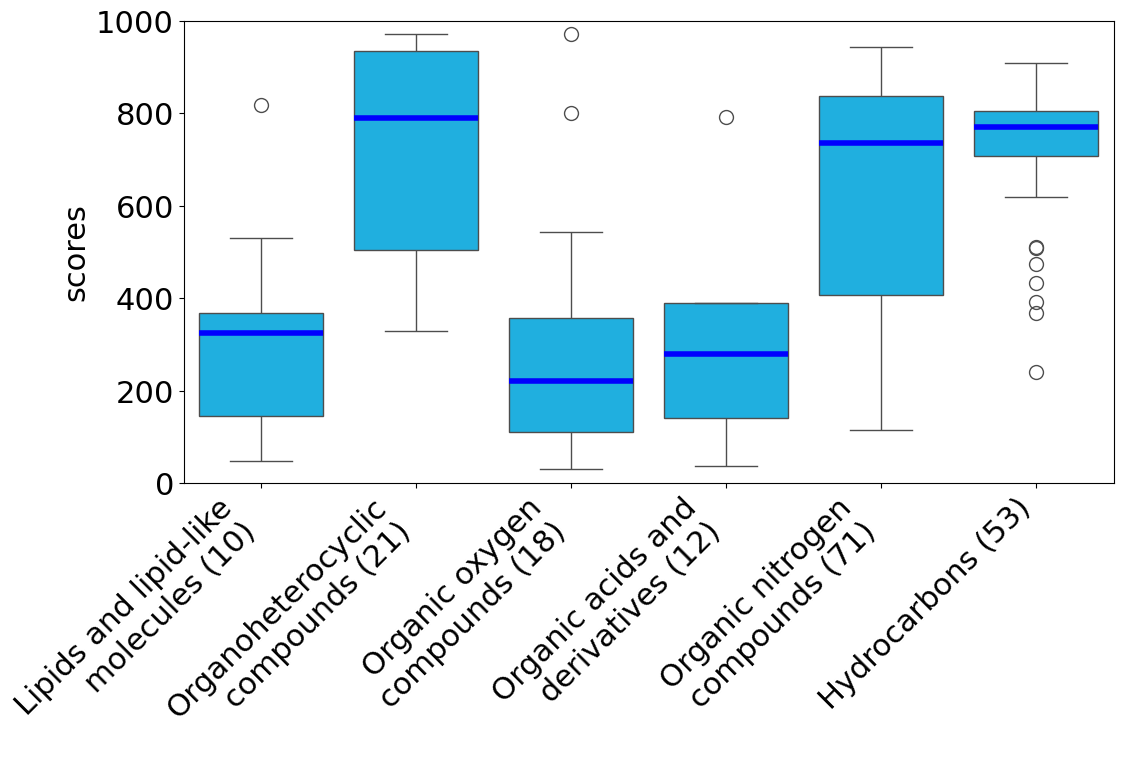

In [14]:
order = [
    "Lipids and lipid-like molecules",
    "Organoheterocyclic compounds",
    "Organic oxygen compounds",
    "Organic acids and derivatives",
    "Organic nitrogen compounds",
    "Hydrocarbons"
]

make_simple_boxplot(wang_db_merged, x="superclass", y="Dot", order=order).show()

In [15]:
df_wang2022_db_tms_with_classes = load_sdf_into_df("../data/reference/wang2022/3412.sdf")
wang_db_tms_merged = df_wang2022_db_tms_with_classes.set_index("inchikey").join(wang_db_tms.set_index("inchikey")["Dot"])[["superclass","class","subclass","Dot"]].dropna()

/m2b/home/hechth/git/recetox/ei_spectra_predictions/analysis/Python_scripts/plotting.py:267: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation=45, ha=ha)


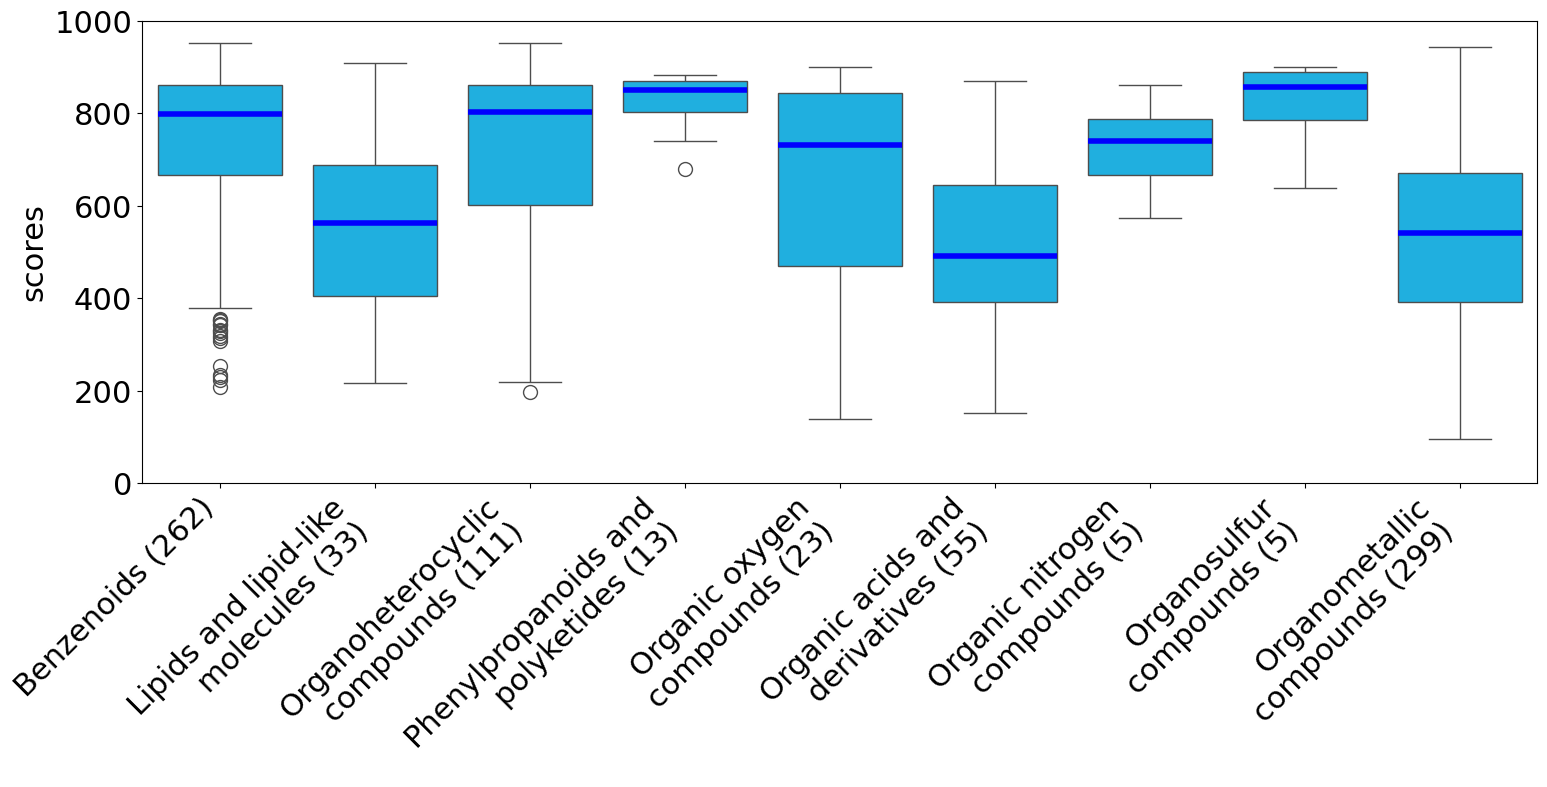

In [16]:
order = [
    "Benzenoids",
    "Lipids and lipid-like molecules",
    "Organoheterocyclic compounds",
    "Phenylpropanoids and polyketides",
    "Organic oxygen compounds",
    "Organic acids and derivatives",
    "Organic nitrogen compounds",
    "Organosulfur compounds",
    "Organometallic compounds"
]
make_simple_boxplot(wang_db_tms_merged, x="superclass", y="Dot", order = order).show()

In [17]:
rcx_db = Chem.SDMolSupplier("../data/experimental/recetox_gc-ei-ms_20201028_properties.sdf", sanitize=True)
wang2020_db = Chem.SDMolSupplier("../data/reference/structure_databases/wang2020.sdf", sanitize=True)
wang2022_es_db = Chem.SDMolSupplier("../data/reference/structure_databases/wang2022_es.sdf", sanitize=True)
wang2022_tms_db = Chem.SDMolSupplier("../data/reference/structure_databases/wang2022_TMS.sdf", sanitize=True)
schreckenbach_db = Chem.SDMolSupplier("../data/reference/structure_databases/schreckenbach_db.sdf", sanitize=True)
asgeirsson_db = Chem.SDMolSupplier("../data/reference/structure_databases/asgeirsson.sdf", sanitize=True)
lee2022_db = Chem.SDMolSupplier("../data/reference/structure_databases/lee2022.sdf", sanitize=True)

In [18]:
rcx_df = sdf_to_dataframe(rcx_db)
wang2020_df = sdf_to_dataframe(wang2020_db)
wang2022_es_df = sdf_to_dataframe(wang2022_es_db)
wang2022_tms_df = sdf_to_dataframe(wang2022_tms_db)
schreckenbach_df = sdf_to_dataframe(schreckenbach_db)
asgeirsson_df = sdf_to_dataframe(asgeirsson_db)
lee2022_df = sdf_to_dataframe(lee2022_db)

In [19]:
rcx_df_means = rcx_df.mean()
wang2020_df_means = wang2020_df.mean()
wang2022_es_df_means = wang2022_es_df.mean()
wang2022_tms_df_means = wang2022_tms_df.mean()
schreckenbach_df_means = schreckenbach_df.mean()
asgeirsson_df_means = asgeirsson_df.mean()
lee2022_df_means = lee2022_df.mean()

In [20]:
rcx_df_vals = rcx_df.agg(['mean', 'min', 'max']).stack()
wang2020_df_vals = wang2020_df.agg(['mean', 'min', 'max']).stack()
wang2022_es_df_vals = wang2022_es_df.agg(['mean', 'min', 'max']).stack()
wang2022_tms_df_vals = wang2022_tms_df.agg(['mean', 'min', 'max']).stack()
schreckenbach_df_vals = schreckenbach_df.agg(['mean', 'min', 'max']).stack()
asgeirsson_df_vals = asgeirsson_df.agg(['mean', 'min', 'max']).stack()
lee2022_df_vals = lee2022_df.agg(['mean', 'min', 'max']).stack()

In [21]:
df_vals = pd.DataFrame(
    [
        rcx_df_vals,
        wang2020_df_vals,
        wang2022_es_df_vals,
        wang2022_tms_df_vals,
        schreckenbach_df_vals,
        asgeirsson_df_vals,
        lee2022_df_vals
    ],
    index=[
        'this',
        'Wang2020',
        'Wang2022_ES',
        'Wang2022_TMS',
        'Schreckenbach2021',
        'Asgeirsson2017',
        'Lee2022'
    ]
)
df_vals = df_vals.reorder_levels([1, 0], axis=1)

In [22]:
df_vals.columns = df_vals.columns.map('_'.join)
df_vals.columns = df_vals.columns.str.replace('_', '')

In [23]:
df_vals_transposed = df_vals.transpose()
df_vals_transposed.head()

,this,Wang2020,Wang2022_ES,Wang2022_TMS,Schreckenbach2021,Asgeirsson2017,Lee2022
natomsmean,33.013624,21.953659,22.82500,33.672980,31.031250,19.761905,18.278481
aromaticnitrogensmean,0.452316,0.056098,0.00000,0.126263,0.031250,0.000000,1.392405
molecularcomplexitymean,0.729808,0.473226,0.46754,0.526534,0.594484,0.271450,0.756278
molecularflexibilitymean,0.364990,0.330405,0.30177,0.630376,0.514578,0.400975,0.043321
rotatablebondsmean,3.264305,2.653659,1.70000,4.407828,4.218750,1.428571,0.000000


In [24]:
df_vals_transposed.to_csv("study_comparisons_t.csv", float_format='%.2f')

In [25]:
df_vals.to_csv("study_comparisons.csv", float_format='%.2f')

In [26]:
df_means = pd.DataFrame(
    [
        rcx_df_means,
        wang2020_df_means,
        wang2022_es_df_means,
        wang2022_tms_df_means,
        schreckenbach_df_means,
        asgeirsson_df_means,
        lee2022_df_means
    ],
    index=[
        'RCX2024',
        'Wang2020',
        'Wang2022_ES',
        'Wang2022_TMS',
        'Schreckenbach2021',
        'Asgeirsson2017',
        'Lee2022'
    ]
)

In [27]:
df_means.to_csv("reference_datasets_means.csv", float_format='%.3f')